## Gradient Descent for Linear Regression

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

### Using the Two data model
A model which can predict housing prices given the size of the house.
A house with 1000 square feet sold for `$300,000` and a house with 2000 square feet sold for `$500,000`.


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |

In [2]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

### Cost function
From the costfunction.ipynb

In [3]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i])**2
        cost_sum += cost
    total_cost = (1/(2 * m)) * cost_sum

    return total_cost

## Gradient descent
$$repeat\ untill\ convergence:\{
    \\
    w= w - \alpha \frac{\delta J(w,b)}{\delta w} \\
    \\
    b= b - \alpha \frac{\delta J(w,b)}{\delta b}
    \\
    \}$$

where parameters $w, b$  aree updated simultaneously.

Here the partial dericatives can be written as
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$


In [5]:
# implementing calculating gradients
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range (m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]

        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

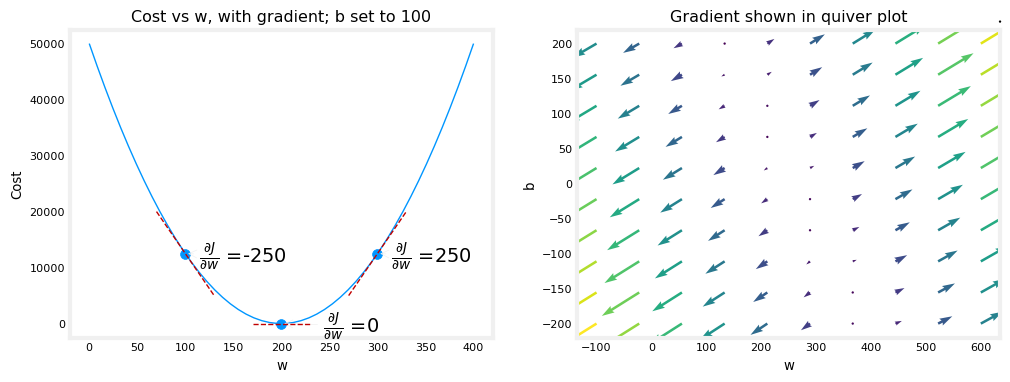

In [6]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()